In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




In [4]:
file_path = 'C:/Users/USER/OneDrive/Dokumen/Kulyah smt 4/Penambangan Data dan Analisis Bisnis/Data/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

## 1. Eksplorasi Awal

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 1a. Jumlah total penumpang
total_passengers = len(df)
total_passengers

891

In [8]:
# b. Jumlah penumpang selamat dan tidak selamat
survival_counts = df['Survived'].value_counts().rename(index={0: 'Tidak Selamat', 1: 'Selamat'})
survival_counts

Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64

In [ ]:
# rata-rata umur penumpang
rata_rata_umur = df['Age'].mean()
(f"Rata-rata umur penumpang adalah: {rata_rata_umur:.2f} tahun")


'Rata-rata umur penumpang adalah: 29.70 tahun'

In [10]:
# penumpang termuda
umur_termuda = df['Age'].min()
penumpang_termuda = df[df['Age'] == umur_termuda][['Name', 'Age']]
penumpang_termuda


,Name,Age
803,"Thomas, Master. Assad Alexander",0.42


In [11]:
# penumpang tertua
umur_tertua = df['Age'].max()
penumpang_tertua = df[df['Age'] == umur_tertua][['Name', 'Age']]
(f"Umur tertua penumpang: {umur_tertua} tahun")
penumpang_tertua


,Name,Age
630,"Barkworth, Mr. Algernon Henry Wilson",80.0


In [12]:
# d. Jumlah penumpang berjenis kelamin pria dan wanita
gender_counts = df['Sex'].value_counts()
gender_counts

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
# e. Jumlah penumpang berdasarkan kelas
class_counts = df['Pclass'].value_counts().sort_index()
class_percentage = (class_counts / total_passengers * 100).round(2)
class_counts.to_dict(),

({1: 216, 2: 184, 3: 491},)

In [14]:
# presentase kelas 1
f"{class_percentage[1]}%"

'24.24%'

C:\Users\USER\AppData\Local\Temp\ipykernel_8032\408166152.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


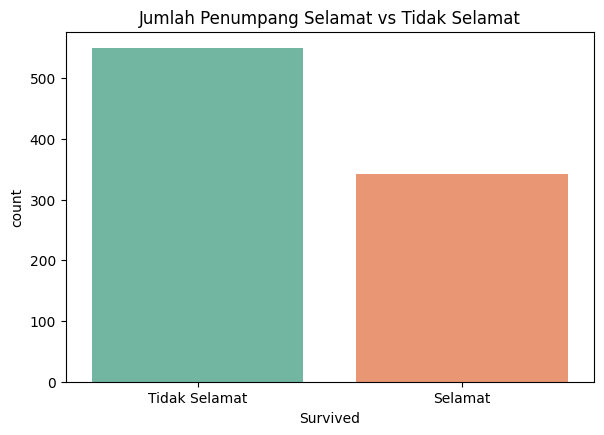

In [ ]:
# 1: Survival
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=df, palette='Set2')
plt.xticks([0, 1], ['Tidak Selamat', 'Selamat'])
plt.title('Jumlah Penumpang Selamat vs Tidak Selamat')

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8032\2314175602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set1')


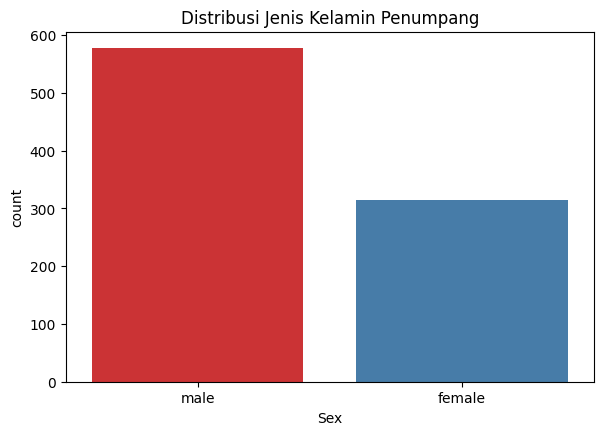

In [ ]:
# 2: Gender
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.countplot(x='Sex', data=df, palette='Set1')
plt.title('Distribusi Jenis Kelamin Penumpang')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8032\3720562528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set3')


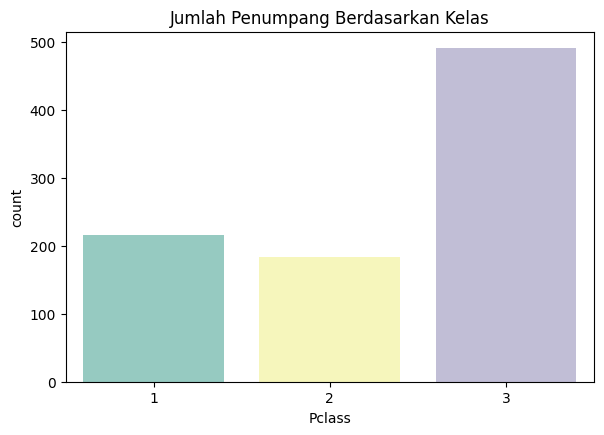

In [ ]:
# 3: Class
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.countplot(x='Pclass', data=df, palette='Set3')
plt.title('Jumlah Penumpang Berdasarkan Kelas')
plt.show()

## 2. Prepocessing

In [ ]:
# a. missing values
missing_values = df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

b. Menangani missing values
- Untuk kolom umur atau age saya tangani missing value dengan menggunakan median, karena pada kolom umur memiliki oulier dan distribusi yang tidak simetris, maka saya menggunakan median agar lebih stabil.
- Untuk kolom Embarked saya isi dengan modus, karena data kategori, jadi nilai yang sering muncul dianggap tepat.
- untuk kolom cabin saya drop, karena terdapat banyak sekali missing value sekitar 77%, jadi saya drop agar hasil tidak menadi bias

In [19]:
# b. Tangani missing values

# Umur saya isi dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked saya isi dengan modus 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Karena cabin terlalu banyak yang kosong jadi saya drop
df_cleaned = df.drop(columns=['Cabin'])

# Cek kembali missing values setelah penanganan
missing_values_after = df_cleaned.isnull().sum()
missing_values_after.to_dict(),

C:\Users\USER\AppData\Local\Temp\ipykernel_8032\1569508982.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_8032\1569508982.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

({'PassengerId': 0,
  'Survived': 0,
  'Pclass': 0,
  'Name': 0,
  'Sex': 0,
  'Age': 0,
  'SibSp': 0,
  'Parch': 0,
  'Ticket': 0,
  'Fare': 0,
  'Embarked': 0},)

C. Terdapat outlier pada: 66 outlier pada umur dan 166 outlier pada fare
Outlier adalah nilai yang jauh berbeda dari nilai lainnya dalam kumpulan data
    

In [ ]:
# Q1, Q3 dan IQR
Q1 = df_cleaned[['Age', 'Fare']].quantile(0.25)
Q3 = df_cleaned[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

# batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# deteksi outlier
outlier_mask = (df_cleaned[['Age', 'Fare']] < lower_bound) | (df_cleaned[['Age', 'Fare']] > upper_bound)

# jumlah outlier
outlier_counts = outlier_mask.sum()
print("Jumlah Outlier:")
print(outlier_counts)


Jumlah Outlier:
Age      66
Fare    116
dtype: int64


D. apakah outlier perlu diatasi?, jadi jawabannya adalah tergantung model. Apabila seperti Decision Tree tahan terhadap outlier, tetapi Regresi dan KNN sangat sensitif.

In [ ]:
# Q1, Q3, dan IQR untuk Age dan Fare
Q1 = df_cleaned[['Age', 'Fare']].quantile(0.25)
Q3 = df_cleaned[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter (mask) untuk data yang bukan outlier
mask = ~((df_cleaned[['Age', 'Fare']] < lower_bound) | (df_cleaned[['Age', 'Fare']] > upper_bound)).any(axis=1)

# dataframe baru tanpa outlier
df_no_outlier = df_cleaned[mask].copy()

# jumlah data setelah outlier dibuang
print(f"Jumlah data sebelum dibuang outlier: {len(df_cleaned)}")
print(f"Jumlah data setelah dibuang outlier: {len(df_no_outlier)}")


Jumlah data sebelum dibuang outlier: 891
Jumlah data setelah dibuang outlier: 721


e. saya akan mengscaling data karena Fare memiliki distribusi sangat miring dan bernilai besat, age dan Fare sangat berbeda skala, jika saya menggunakan model sperti KNN, SVM, Logistic Regression itu sangat dipengaruhi oleh skala data

In [22]:
from sklearn.preprocessing import StandardScaler

# Mengcopy daata
df_scaled = df_no_outlier.copy()

# Inisialisasi scaler
scaler = StandardScaler()

# Kolom yang akan discaling
numerical_features = ['Age', 'Fare']

# Scaling
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])
print(df_scaled[numerical_features].describe())


                Age          Fare
count  7.210000e+02  7.210000e+02
mean  -1.872443e-16  5.420229e-17
std    1.000694e+00  1.000694e+00
min   -2.505671e+00 -1.283040e+00
25%   -6.085180e-01 -7.004801e-01
50%   -9.417211e-03 -3.773784e-01
75%    4.898335e-01  6.352657e-01
max    2.586686e+00  3.512724e+00


## 3. Modelling

a. Data training adalah adata yang digunakan untuk melaatih model
data testing adalah data yang digynakan untuk mengukur peforma model
Mengapa perlu untuk dibagi? Karena Untuk mengevaluasi seberapa baik model mempelajari pola dari data, tanpa overfitting dan Untuk mengukur akurasi model terhadap data baru yang belum pernah dilihat sebelumnya

b. Saya sendiri menggunakan pembagian yang umum digunakan yaitu, 80% data training dan 20% data testing. Kenapa memilih 80:20, karena memberikan Keseimbangan yang optimal untuk dataset dengan ukuran sedang seperti Titanic 

In [23]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Survived', axis=1)
y = df_scaled['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")


Jumlah data training: 576
Jumlah data testing: 145


c. 1. Logistic Regression
Model ini digunakan untuk klasifikasi biner. Ia menghitung probabilitas kelas target menggunakan fungsi sigmoid, lalu menentukan kelas berdasarkan ambang batas (biasanya 0.5)
2. Random Forest Classifier
Model ini adalah ensembel dari banyak pohon keputusan. Setiap pohon dilatih dengan subset data yang berbeda (bagging), dan hasil akhirnya ditentukan dengan voting dari semua pohon.
3. KNN bekerja dengan mencari K tetangga terdekat dari titik data baru, lalu memberikan label berdasarkan mayoritas label tetangga tersebut. Ia tidak belajar pola secara eksplisit, hanya mengandalkan jarak antar titik.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Salin dataset
data = df.copy()

# Hapus kolom yang tidak relevan untuk prediksi
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# missing value
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode kolom kategorikal
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
data['Embarked'] = le_embarked.fit_transform(data['Embarked'])

# Pisahkan fitur dan target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]


C:\Users\USER\AppData\Local\Temp\ipykernel_8032\1021544326.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


(array([[-1.56610693,  0.73769513,  1.24023486, -0.4745452 , -0.47367361,
         -0.07458307,  0.58595414],
        [-0.36936484,  0.73769513, -0.48888662, -0.4745452 , -0.47367361,
         -0.38667072,  0.58595414],
        [ 0.82737724,  0.73769513,  0.20276197, -0.4745452 , -0.47367361,
         -0.48885426,  0.58595414],
        [ 0.82737724,  0.73769513, -0.25833709,  0.43279337, -0.47367361,
         -0.49027979,  0.58595414],
        [ 0.82737724, -1.35557354, -1.79533395,  3.15480905,  2.00893337,
         -0.01870931,  0.58595414]]),
 331    0
 733    0
 382    0
 704    0
 813    0
 Name: Survived, dtype: int64)

In [27]:
# latih model Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# Prediksi
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [28]:
# latih model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [29]:
#latih model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

d. - Accracy
presentase prediksi yang benar dari semua data.
- Precision 
Dari data yang diprediksi posifit, berapa yang benar benar positif
- Recall
Dari semua data yang benar benar posif, berapa yang berhasil diprediksi
- F1 Score
Rata-rata harmonik  dari precision dan recall

In [30]:
# Evaluasi Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Evaluasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Evaluasi KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Tampilkan hasil
print("=== Logistic Regression ===")
print(f"Accuracy : {accuracy_logreg:.3f}")
print(f"Precision: {precision_logreg:.3f}")
print(f"Recall   : {recall_logreg:.3f}")
print(f"F1 Score : {f1_logreg:.3f}\n")

print("=== Random Forest ===")
print(f"Accuracy : {accuracy_rf:.3f}")
print(f"Precision: {precision_rf:.3f}")
print(f"Recall   : {recall_rf:.3f}")
print(f"F1 Score : {f1_rf:.3f}\n")

print("=== K-Nearest Neighbors ===")
print(f"Accuracy : {accuracy_knn:.3f}")
print(f"Precision: {precision_knn:.3f}")
print(f"Recall   : {recall_knn:.3f}")
print(f"F1 Score : {f1_knn:.3f}")


=== Logistic Regression ===
Accuracy : 0.804
Precision: 0.783
Recall   : 0.730
F1 Score : 0.755

=== Random Forest ===
Accuracy : 0.816
Precision: 0.797
Recall   : 0.743
F1 Score : 0.769

=== K-Nearest Neighbors ===
Accuracy : 0.799
Precision: 0.771
Recall   : 0.730
F1 Score : 0.750


e. Dari hasil ketiga algoritma yang telah saya coba Random Forest memberikan hasil terbaik karena mampu menangkap pola kompleks dalam data ini, terutaa interaksi antar fitur seperti kelas, usia, jenis kelamin, dan jumlah keluargaa

## 4. Evaluasi

In [32]:
# a.classification report model terbaik
from sklearn.metrics import classification_report

# classification report untuk Random Forest
report = classification_report(y_test, y_pred_rf, target_names=['Tidak Selamat', 'Selamat'], output_dict=True)

# Ambil precision dan recall untuk label "Selamat"
precision_selamat = report['Selamat']['precision']
recall_selamat = report['Selamat']['recall']

# Tampilkan hasil
print("Classification Report - Random Forest")
print(f"Precision (Selamat): {precision_selamat:.3f}")
print(f"Recall    (Selamat): {recall_selamat:.3f}")


Classification Report - Random Forest
Precision (Selamat): 0.797
Recall    (Selamat): 0.743


In [34]:
# b. prediksi selamat, dan berapa di antaranya benar-benar selamat
# jumlah penumpang yang diprediksi selamat (label = 1)
predicted_selamat = (y_pred_rf == 1).sum()

# jumlah penumpang yang diprediksi selamat dan benar-benar selamat
true_positives = ((y_pred_rf == 1) & (y_test == 1)).sum()

print(f"Jumlah penumpang yang diprediksi selamat: {predicted_selamat}")
print(f"Jumlah penumpang yang benar-benar selamat dari prediksi tersebut: {true_positives}")


Jumlah penumpang yang diprediksi selamat: 69
Jumlah penumpang yang benar-benar selamat dari prediksi tersebut: 55
